In [2]:
##Dependencies 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats as sts
import numpy as np
import seaborn as sns

In [3]:
### Bring in the dataset

bcorp = pd.read_csv('bcorp.csv')
bcorp.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,"CPI Risk, Finance & Governance",1/13/2017,1/13/2017,certified,CPI is the professional services organisation ...,Management and Financial Consulting,Business Products & Services,"Professional services in risk, finance and gov...",Netherlands,Noord-Holland,...,NaN,2.2,2.3,NaN,2.0,NaN,NaN,2.7,NaN,1
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,E-Waste Solutions,6/8/2017,6/8/2017,certified,A market solution that seeks to reduce the env...,Recycling Services & Waste Management,Energy & Environmental Services,"collection, recovery and reuse of electrical a...",Colombia,Bogotá D.C.,...,1.1,NaN,1.6,0.8,3.2,NaN,NaN,3.7,NaN,1
4,LUMNI CHILE,8/24/2012,7/11/2017,certified,Lumni is a new kind of financial services comp...,Other,Financial Services,Equity Social Investments & Higher Education F...,Chile,Santiago,...,0.2,NaN,0.0,0.0,2.2,NaN,NaN,0.0,NaN,1


In [4]:
bcorp_US = bcorp[bcorp.country == "United States"]
for col in bcorp_US:
    print(col)

company_name
date_first_certified
date_certified
current_status
description
industry
industry_category
products_and_services
country
state
city
sector
size
b_corp_profile
website
assessment_year
overall_score
impact_area_community
impact_area_customers
impact_area_environment
impact_area_governance
impact_area_workers
impact_area_community_na_score
impact_area_customers_na_score
impact_area_environment_na_score
impact_area_governance_na_score
impact_area_workers_na_score
ia_community_it_civic_engagement_giving
ia_community_it_designed_for_charitable_giving
ia_community_it_designed_to_give
ia_community_it_diversity_inclusion
ia_community_it_job_creation
ia_community_it_local_economic_development
ia_community_it_local_involvement
ia_community_it_microdistribution_poverty_alleviation
ia_community_it_microfranchise_poverty_alleviation
ia_community_it_national_economic_development
ia_community_it_producer_cooperative
ia_community_it_suppliers_distributors
ia_community_it_suppliers_distribut

In [18]:
bcorp_US_cleaned["sector"].unique()

array(['Service with Minor Environmental Footprint', 'Wholesale/Retail',
       'Service with Significant Environmental Footprint',
       'Manufacturing', 'Agriculture/Growers', 'Service'], dtype=object)

In [19]:
#Groups for ANOVA
group1 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service with Minor Environmental Footprint"]["overall_score"]
group2 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Wholesale/Retail"]["overall_score"]
group3 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service with Significant Environmental Footprint"]["overall_score"]
group4 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Manufacturing"]["overall_score"]
group5 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Agriculture/Growers"]["overall_score"]
group6 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service"]["overall_score"]

In [34]:
sts.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=6.886614141276574, pvalue=0.001038252455637447)

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#print pairwise_tukeyhsd(Data, Group)
df = pd.DataFrame()
df = pd.DataFrame({
       "group1": group1,
       "group2": group2,
       "group3": group3,
       "group4": group4,
       "group5": group5,
       "group6": group6
})

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment',
                                            0:'result'})
stacked_data

,id,treatment,result
0,1,group1,115.0
1,2,group1,90.5
2,9,group1,90.5
3,10,group1,120.3
4,11,group1,116.7
...,...,...,...
3385,6673,group4,84.9
3386,6674,group1,84.4
3387,6682,group3,104.2
3388,6683,group3,95.8


In [49]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment'])
MultiComp
print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
group1 group2  -2.4558 0.0158   -4.624 -0.2875   True
group1 group3   1.3936 0.8017  -1.8517  4.6389  False
group1 group4  -1.3318 0.6808  -3.9801  1.3165  False
group1 group5   2.8765 0.6624  -2.7191  8.4721  False
group1 group6  -7.8512 0.8127 -26.4211 10.7187  False
group2 group3   3.8494 0.0259   0.2798   7.419   True
group2 group4    1.124 0.8994  -1.9131   4.161  False
group2 group5   5.3323 0.0911  -0.4574 11.1219  False
group2 group6  -5.3954    0.9 -24.0248 13.2339  False
group3 group4  -2.7254 0.3409  -6.6054  1.1546  False
group3 group5   1.4829    0.9  -4.7902  7.7559  False
group3 group6  -9.2448 0.6985   -28.03  9.5404  False
group4 group5   4.2083 0.3399  -1.7777 10.1943  False
group4 group6  -6.5194    0.9 -25.2107 12.1719  False
group5 group6 -10.7277 0.5951  -30.058  8.6026  False
----------------------------

In [39]:
#tukey = pairwise_tukeyhsd(bcorp_US_cleaned, 'sector')
sts.multicomp.TukeyHSDResults(group1, group2, group3, group4, group5, group6, alpha = 0.05)

AttributeError: module 'scipy.stats' has no attribute 'multicomp'

In [9]:
bcorp_US_cleaned = bcorp_US.drop(['website', 'b_corp_profile', 'description', 
                                  'industry', 'industry_category', 'products_and_services',
                                  'country', 'state', 'city', 'size', 'impact_area_community_na_score',
                                 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score',
                                 'impact_area_workers_na_score'], axis = 1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [10]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_community_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [8]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_customers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [11]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_environment_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [10]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_workers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,ia_governance_it_corporate_accountability,ia_governance_it_ethics,ia_governance_it_governance,ia_governance_it_mission_engagement,ia_governance_it_mission_locked,ia_governance_it_transparency,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,0.0,NaN,NaN,4.0,2.5,3.5,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,NaN,NaN,NaN,1.9,2.5,3.5,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,0.0,NaN,NaN,1.7,7.5,3.5,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,NaN,NaN,NaN,3.7,10.0,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,0.0,NaN,NaN,1.5,2.5,1.3,2


In [13]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_governance_it' in col],axis=1)
bcorp_US_cleaned.nunique()

company_name                                                          1817
date_first_certified                                                  1288
date_certified                                                        1751
current_status                                                           2
sector                                                                   6
assessment_year                                                         14
overall_score                                                          627
impact_area_community                                                  629
impact_area_customers                                                  572
impact_area_environment                                                545
impact_area_governance                                                 206
impact_area_workers                                                    396
ia_customers_it_arts_media_culture                                      74
ia_customers_it_basic_ser

In [12]:
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,2


## Assessing relative impact of each impact area on the overall score

#### Relative impact of  "Community" Impact Area on Overall Score

In [13]:
##Run linear regression on Community impact area on overall score
(s, i, rcom, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
rcom
#r squared output tells us community impact area explains approximately 38% of the variation in overall score
regress_values_community = bcorp_US_cleaned.impact_area_community * s + i
line_eq_comm = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_comm

'y = 0.44x + 84.38'

#### Community Impact Area vs. Overall Score Scatterplot

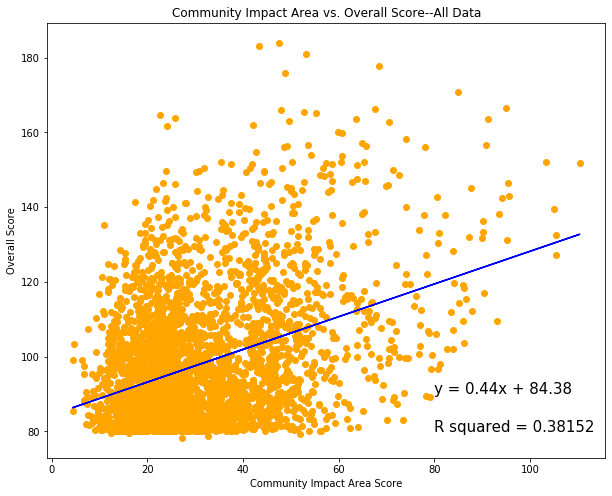

In [14]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score, color = 'orange')
plt.plot(bcorp_US_cleaned.impact_area_community, regress_values_community, "b-")
plt.annotate("R squared = "+str(round(rcom,5)), (80,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_comm, (80, 90), fontsize = 15, color = 'black')
plt.title("Community Impact Area vs. Overall Score--All Data")
plt.xlabel("Community Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("community_ia_vs_overall.png")

#### Relative Impact of "Governance" Impact Area on Overall Score

In [15]:
##Governance linregress
(s, i, rg, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
rg
regress_values_gov = bcorp_US_cleaned.impact_area_governance * s + i
line_eq_gov = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_gov

'y = 0.97x + 84.99'

#### Governance Impact Area vs. Overall Score Scatterplot

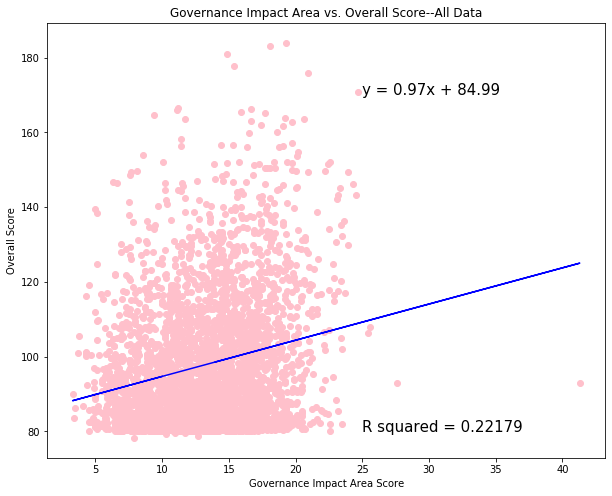

In [16]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score, color = 'pink')
plt.plot(bcorp_US_cleaned.impact_area_governance, regress_values_gov, "b-")
plt.annotate("R squared = "+str(round(rg,5)), (25,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_gov, (25, 170), fontsize = 15, color = 'black')
plt.title("Governance Impact Area vs. Overall Score--All Data")
plt.xlabel("Governance Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("governance_ia_vs_overall.png")

#### Relative impact of "Environment" Impact Area on Overall Score

In [17]:
##Environment linregress
(s, i, re, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_environment, bcorp_US_cleaned.overall_score)
re
regress_values_env = bcorp_US_cleaned.impact_area_environment * s + i
line_eq_env = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_env

'y = 0.19x + 94.38'

#### Environment Impact Area vs. Overall Score Scatterplot

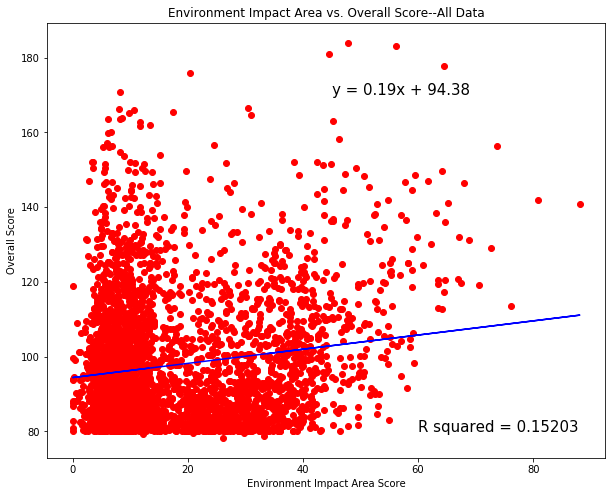

In [18]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_environment, bcorp_US_cleaned.overall_score, color = 'red')
plt.plot(bcorp_US_cleaned.impact_area_environment, regress_values_env, "b-")
plt.annotate("R squared = "+str(round(re, 5)), (60,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_env, (45, 170), fontsize = 15, color = 'black')
plt.title("Environment Impact Area vs. Overall Score--All Data")
plt.xlabel("Environment Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("environment_ia_vs_overall.png")

#### Relative Impact of "Workers" Impact Area on Overall Score

In [24]:
##Workers linregress
# (s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
# r
# regress_values_work = bcorp_US_cleaned.impact_area_workers * s + i
# line_eq_work = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
workers_array = bcorp_US_cleaned.impact_area_workers.to_numpy(dtype = int)
nan_array_work = np.isnan(workers_array)
not_nan_array_work = ~ nan_array_work
workers_nonan = workers_array[not_nan_array_work]
workers_nonan
(slope, intercept, rvaluew, pvalue, stderr) = sts.linregress(workers_nonan, overallscore_array)
rvaluew

##Workers linregress
regress_values_workers = workers_nonan * s + i
line_eq_work = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_work

'y = 2.3128977036523102e-10x + 97.48'

#### Workers Impact Area vs. Overall Score Scatterplot

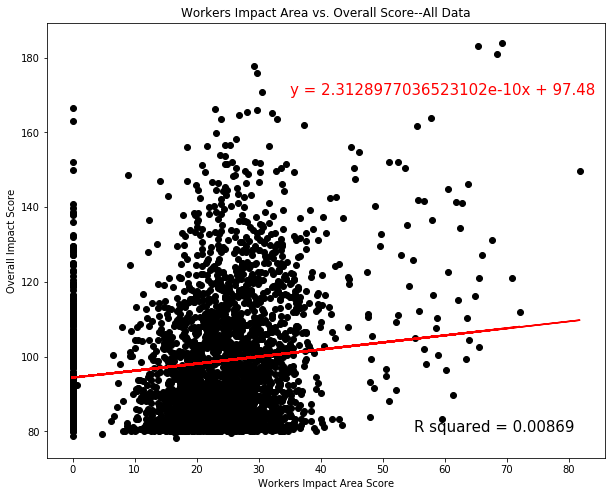

In [25]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned['impact_area_workers'], bcorp_US_cleaned['overall_score'], color = 'black')
plt.plot(bcorp_US_cleaned.impact_area_workers, regress_values_workers, "r-")
plt.annotate(line_eq_work,(35,170),fontsize=15,color="red")
plt.annotate("R squared = " + str(round(rvaluew, 5)), (55, 80), fontsize = 15, color = "black" )
plt.title("Workers Impact Area vs. Overall Score--All Data")
plt.xlabel("Workers Impact Area Score")
plt.ylabel("Overall Impact Score")
plt.savefig("worker_ia_vs_overall.png")

#### Relative Impact of "Customers" Impact Area on Overall Score

In [21]:
#Filter out NaNs from impact area customers series, run regression with it as np array
customers_array = bcorp_US_cleaned['impact_area_customers'].to_numpy(dtype = int)
customers_array
overallscore_array = bcorp_US_cleaned['overall_score'].to_numpy(dtype = int)
overallscore_array
nan_array_cust = np.isnan(customers_array)
not_nan_array_cust = ~ nan_array_cust
customers_nonan = customers_array[not_nan_array_cust]
customers_nonan 
#attempt regression 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(customers_nonan, overallscore_array)
rvalue 
regress_values_customers = customers_nonan * slope + intercept
line_eq_customers = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_customers

'y = 2.450811931862826e-09x + 97.61'

#### Customers Impact Area vs. Overall Score--Scatter plot w/linear regression plotted on top. 

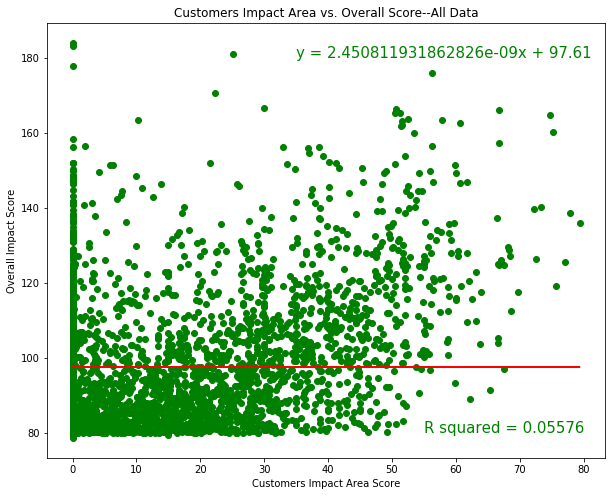

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned['impact_area_customers'], bcorp_US_cleaned['overall_score'], color = 'green')
plt.plot(bcorp_US_cleaned.impact_area_customers, regress_values_customers, "r-")
plt.annotate(line_eq_customers,(35,180),fontsize=15,color="green")
plt.annotate("R squared = " + str(round(rvalue, 5)), (55, 80), fontsize = 15, color = "green" )
plt.title("Customers Impact Area vs. Overall Score--All Data")
plt.xlabel("Customers Impact Area Score")
plt.ylabel("Overall Impact Score")
plt.savefig("customer_ia_vs_overall.png")

#### Running correlation between all 5 impact areas and overall score

In [33]:
#Put only impact areas into separate df for correlation
# impact_correlation = bcorp_US_cleaned.corr(method = 'pearson')
# impact_correlation = impact_correlation.drop(labels = 'certification_cycle', axis = 1)
# impact_correlation = impact_correlation.drop(labels = 'assessment_year', axis = 1)
impact_correlation_trimmed = impact_correlation.drop([col for col in impact_correlation.columns if 'impact_area' in col],axis=1)
impact_correlation_trimmed

,overall_score
assessment_year,-0.154907
overall_score,1.000000
impact_area_community,0.381523
impact_area_customers,0.372143
impact_area_environment,0.152033
impact_area_governance,0.221790
impact_area_workers,0.221914
certification_cycle,0.150745


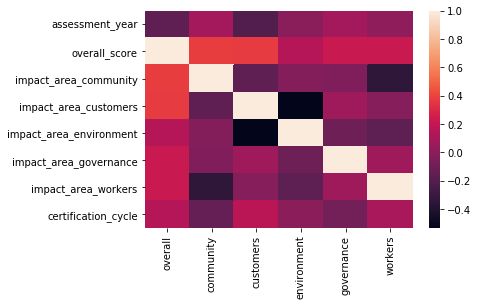

In [40]:
impact_correlation.columns = ['overall', 'community', 'customers', 'environment', 'governance', 'workers']
impact_correlation
corrmap = sns.heatmap(impact_correlation)
figure = corrmap.get_figure()
figure.savefig('correlation_heatmap.png')

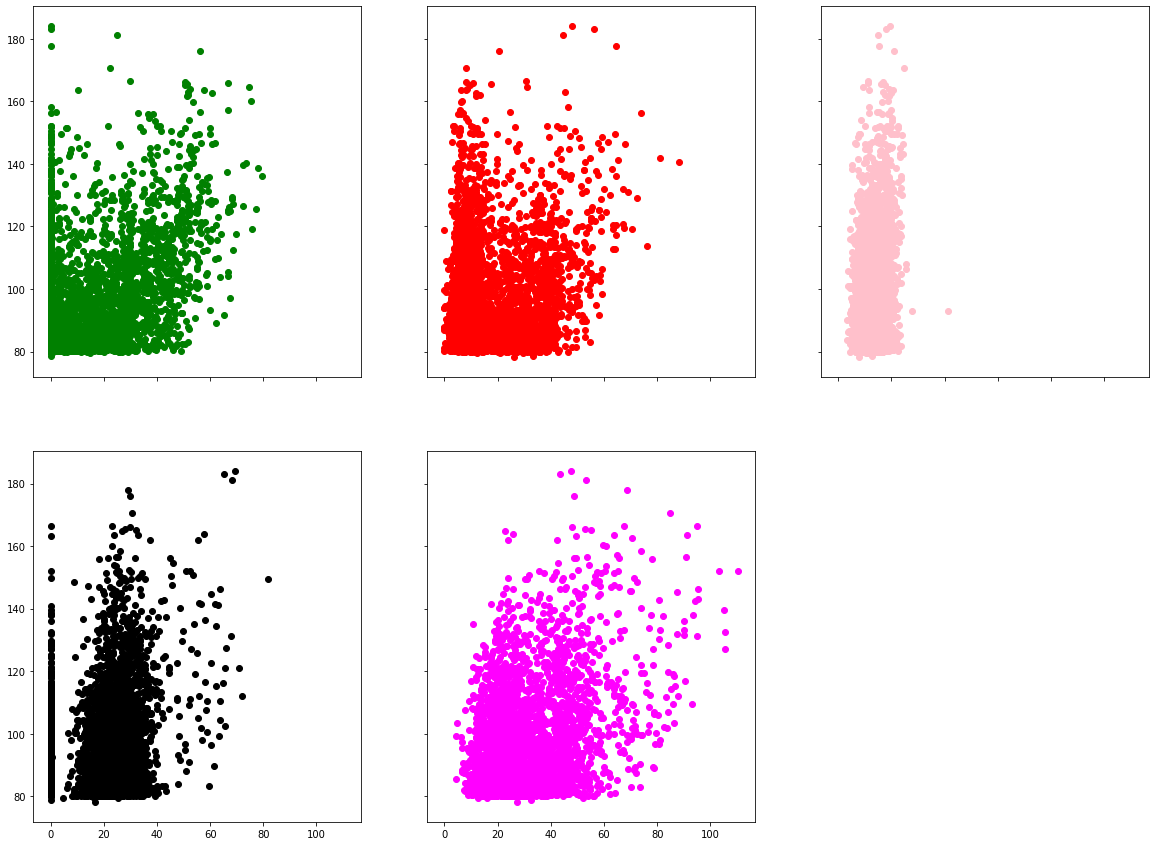

In [34]:
#Scatter plot of community impact area vs overall score
# .corr or numpy polyfit (np.polyfit, lsqregr)
f, axs = plt.subplots(nrows = 2, ncols = 3, sharex = True, sharey = True, figsize = (20,15))
axs[0,0].scatter(bcorp_US_cleaned['impact_area_customers'], bcorp_US_cleaned['overall_score'], color = 'green')
axs[0,1].scatter(bcorp_US_cleaned['impact_area_environment'], bcorp_US_cleaned['overall_score'], color = 'red')
axs[0,2].scatter(bcorp_US_cleaned['impact_area_governance'], bcorp_US_cleaned['overall_score'], color = 'pink')
axs[1,0].scatter(bcorp_US_cleaned['impact_area_workers'], bcorp_US_cleaned['overall_score'], color = 'black')
axs[1,1].scatter(bcorp_US_cleaned['impact_area_community'], bcorp_US_cleaned['overall_score'], color = 'magenta')
f.delaxes(axs[1,2])


In [18]:
## Calculate regression values for each impact area--do it in a function!
## ASK A TA ABOUT THIS! 
def impact_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq

In [69]:
impact_regression(bcorp_US_cleaned['impact_area_environment'], bcorp_US_cleaned['overall_score'])


'y = nanx + nan'

In [71]:
bcorp_US_cleaned['overall_score']

1       115.0
2        90.5
9        90.5
10      120.3
11      116.7
        ...  
6673     84.9
6674     84.4
6682    104.2
6683     95.8
6693     82.5
Name: overall_score, Length: 3390, dtype: float64

In [61]:
#Filter out NaNs from impact area

company_name               3390
date_first_certified       3390
date_certified             3390
current_status             3390
assessment_year            3390
overall_score              3390
impact_area_community      3390
impact_area_customers      3273
impact_area_environment    3390
impact_area_governance     3390
impact_area_workers        3047
certification_cycle        3390
dtype: int64

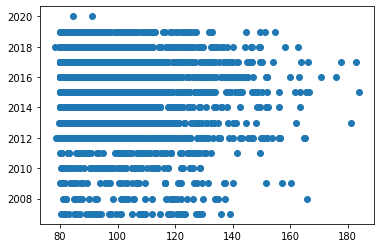

In [36]:
bcorp_US_cleaned 
plt.scatter(bcorp_US_cleaned.overall_score, bcorp_US_cleaned.assessment_year)

plt.show()
